# Importing Libraries

In [134]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import warnings
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=ConvergenceWarning, message=".*ConvergenceWarning.*")


# Reading Data

In [137]:
d = pd.read_csv("car_evaluation.csv")
d.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [139]:
d.shape

(1727, 7)

In [141]:
d.rename(columns={'low':'safety',"small":"lug_boot","2.1":"number of persons","2":"number of doors","vhigh":"buying price","vhigh.1":"maintenance cost"},inplace=True)
d.columns

Index(['buying price', 'maintenance cost', 'number of doors',
       'number of persons', 'lug_boot', 'safety', 'unacc'],
      dtype='object')

In [143]:
d.dtypes

buying price         object
maintenance cost     object
number of doors      object
number of persons    object
lug_boot             object
safety               object
unacc                object
dtype: object

# EDA

In [146]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying price       1727 non-null   object
 1   maintenance cost   1727 non-null   object
 2   number of doors    1727 non-null   object
 3   number of persons  1727 non-null   object
 4   lug_boot           1727 non-null   object
 5   safety             1727 non-null   object
 6   unacc              1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [148]:
d.describe().T.style.background_gradient(cmap='Greens')

,count,unique,top,freq
buying price,1727,4,high,432
maintenance cost,1727,4,high,432
number of doors,1727,4,3,432
number of persons,1727,3,4,576
lug_boot,1727,3,med,576
safety,1727,3,med,576
unacc,1727,4,unacc,1209


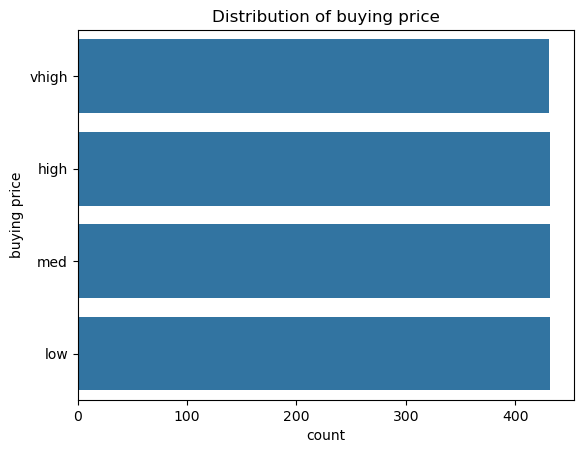

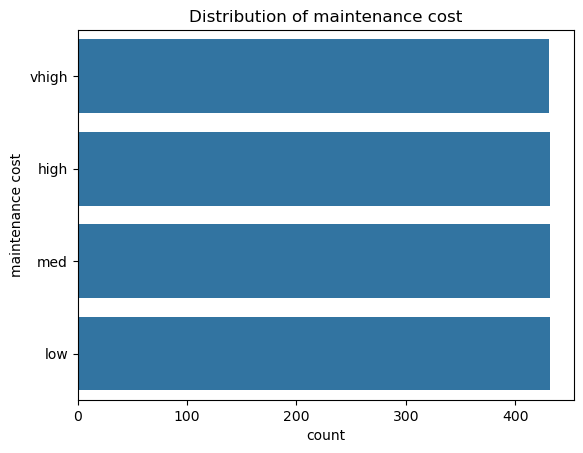

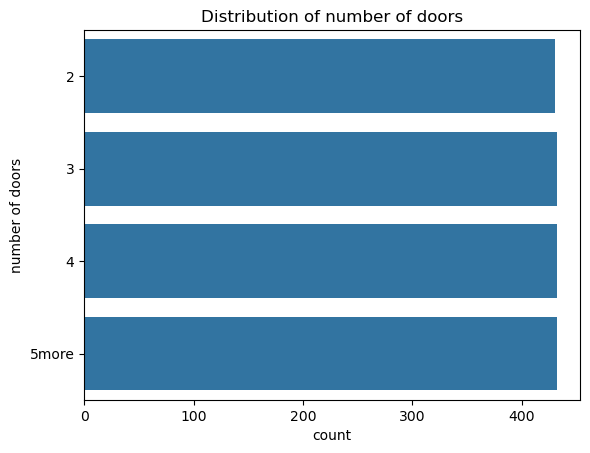

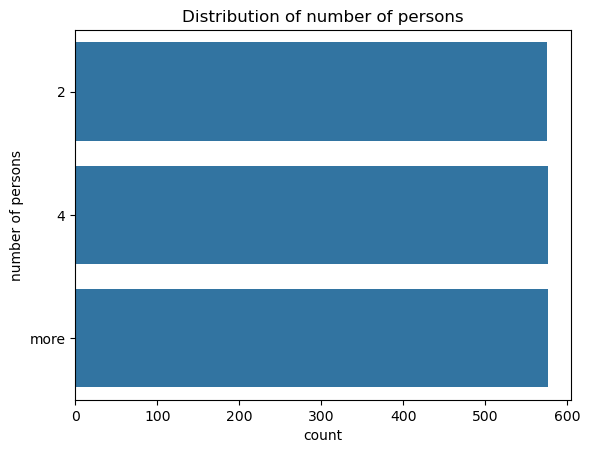

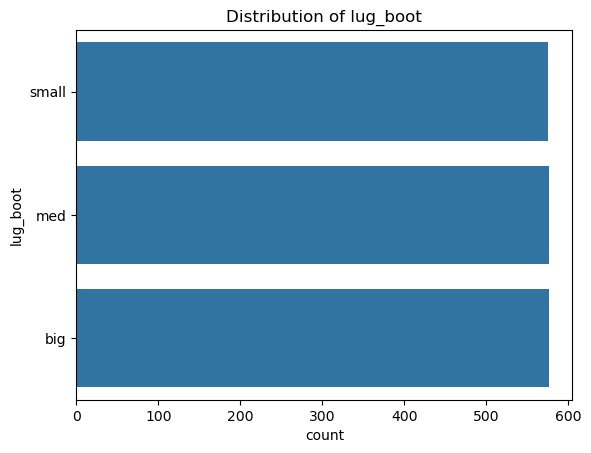

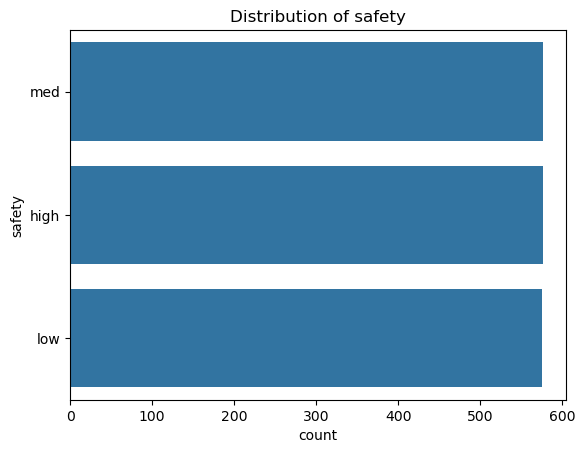

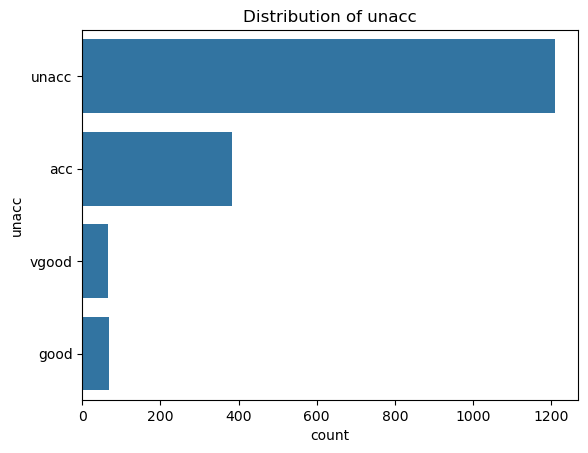

In [150]:
def plot_bar(d,i):
    #fig = plt.figure(figsize = (7, 6))
    plt.subplot(1,1,1)
    sns.countplot(d[i])
    plt.title(f"Distribution of {i}")
    plt.show()
for i in d.columns:
    plot_bar(d,i)

In [152]:
li = list(d.columns)
li

['buying price',
 'maintenance cost',
 'number of doors',
 'number of persons',
 'lug_boot',
 'safety',
 'unacc']

# **Label Encoding**

In [155]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in li:
    d[i] = labelencoder.fit_transform(d[i])

In [157]:
d.head()

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


# Splitting Data

In [160]:
x = d.iloc[:,:-1]
y = d.iloc[:,-1]

In [162]:
x.head()

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0


In [164]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: unacc, dtype: int64

In [166]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state =1)

# Logistic Regression

In [169]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(x_train, y_train)

# Make predictions on the test set
y_pred1 = lr.predict(x_test)

# Calculate and print accuracy on the test set
print(f"Logistic Regression test set accuracy is : {round(accuracy_score(y_test, y_pred1) * 100, 2)} %")

# Perform 5-fold cross-validation on the training data
k = 5
cv_scores = cross_val_score(lr, x_train, y_train, cv=k, scoring='accuracy')

# Calculate the mean accuracy across the 5 folds
mean_cv_accuracy = round(cv_scores.mean() * 100, 2)

# Print cross-validation accuracy
print(f"Logistic Regression cross-validation accuracy with k={k} is: {mean_cv_accuracy} %")


Logistic Regression test set accuracy is : 66.86 %
Logistic Regression cross-validation accuracy with k=5 is: 69.62 %


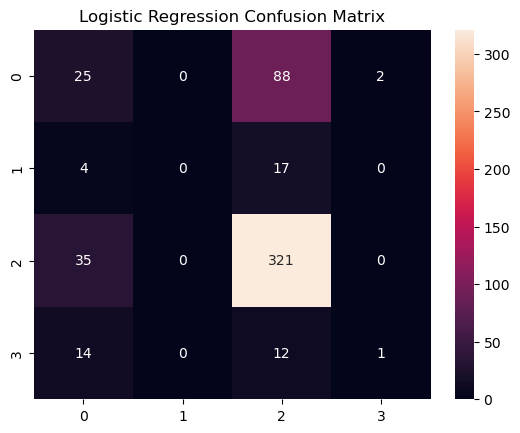

In [171]:
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='g')
plt.show()

In [173]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.32      0.22      0.26       115
           1       0.00      0.00      0.00        21
           2       0.73      0.90      0.81       356
           3       0.33      0.04      0.07        27

    accuracy                           0.67       519
   macro avg       0.35      0.29      0.28       519
weighted avg       0.59      0.67      0.62       519



# Decision Trees

In [176]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Train the model on the training data
dt.fit(x_train, y_train)

# Make predictions on the test set
y_pred3 = dt.predict(x_test)

# Calculate and print accuracy on the test set
print(f"Decision Tree test set accuracy is : {round(accuracy_score(y_test, y_pred3) * 100, 2)} %")

# Perform 5-fold cross-validation on the training data
k = 5
cv_scores = cross_val_score(dt, x_train, y_train, cv=k, scoring='accuracy')

# Calculate the mean accuracy across the 5 folds
mean_cv_accuracy = round(cv_scores.mean() * 100, 2)

# Print cross-validation accuracy
print(f"Decision Tree cross-validation accuracy with k={k} is: {mean_cv_accuracy} %")


Decision Tree test set accuracy is : 96.34 %
Decision Tree cross-validation accuracy with k=5 is: 95.53 %


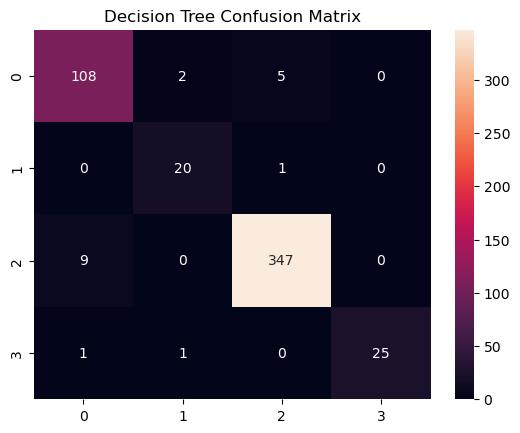

In [178]:
plt.title('Decision Tree Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True,fmt='g')
plt.show()

In [180]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       115
           1       0.87      0.95      0.91        21
           2       0.98      0.97      0.98       356
           3       1.00      0.93      0.96        27

    accuracy                           0.96       519
   macro avg       0.94      0.95      0.94       519
weighted avg       0.96      0.96      0.96       519



# SVM


In [183]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
# Predict on test set with SVM
y_pred_svm = svm_model.predict(x_test)

# Calculate and print accuracy on test set for SVM
svm_test_accuracy = round(accuracy_score(y_test, y_pred_svm) * 100, 2)
print(f"SVM test set accuracy is: {svm_test_accuracy} %")

SVM test set accuracy is: 89.98 %


In [185]:
# Perform 5-fold cross-validation for SVM
k = 5
svm_cv_scores = cross_val_score(svm_model, x_train, y_train, cv=k, scoring='accuracy')
svm_mean_cv_accuracy = round(svm_cv_scores.mean() * 100, 2)
print(f"SVM cross-validation accuracy with k={k} is: {svm_mean_cv_accuracy} %\n")


SVM cross-validation accuracy with k=5 is: 87.17 %



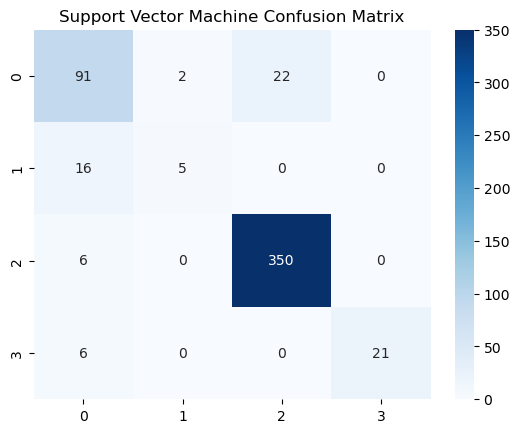

In [187]:
# Plot confusion matrix for SVM
plt.title('Support Vector Machine Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='g', cmap="Blues")
plt.show()

# MLPC

In [228]:
mlp_model = MLPClassifier(hidden_layer_sizes=3,max_iter=100, random_state=1)
mlp_model.fit(x_train, y_train)
y_pred_mlp = mlp_model.predict(x_test)

In [230]:
mlp_test_accuracy = round(accuracy_score(y_test, y_pred_mlp) * 100, 2)
print(f"MLP test set accuracy is: {mlp_test_accuracy} %")

# Perform 5-fold cross-validation for MLP
mlp_cv_scores = cross_val_score(mlp_model, x_train, y_train, cv=k, scoring='accuracy')
mlp_mean_cv_accuracy = round(mlp_cv_scores.mean() * 100, 2)
print(f"MLP cross-validation accuracy with k={k} is: {mlp_mean_cv_accuracy} %\n")

MLP test set accuracy is: 68.59 %
MLP cross-validation accuracy with k=5 is: 70.78 %



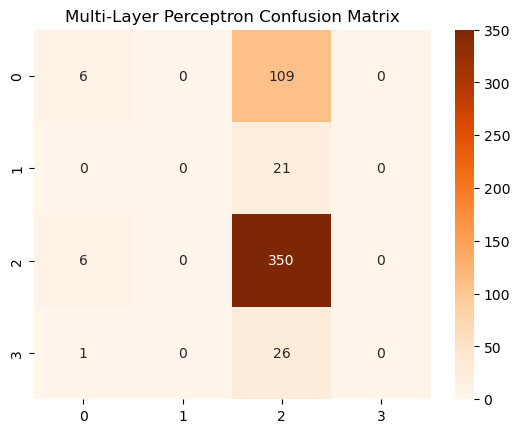

In [232]:
plt.title('Multi-Layer Perceptron Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='g', cmap="Oranges")
plt.show()

# COMPARING THEM

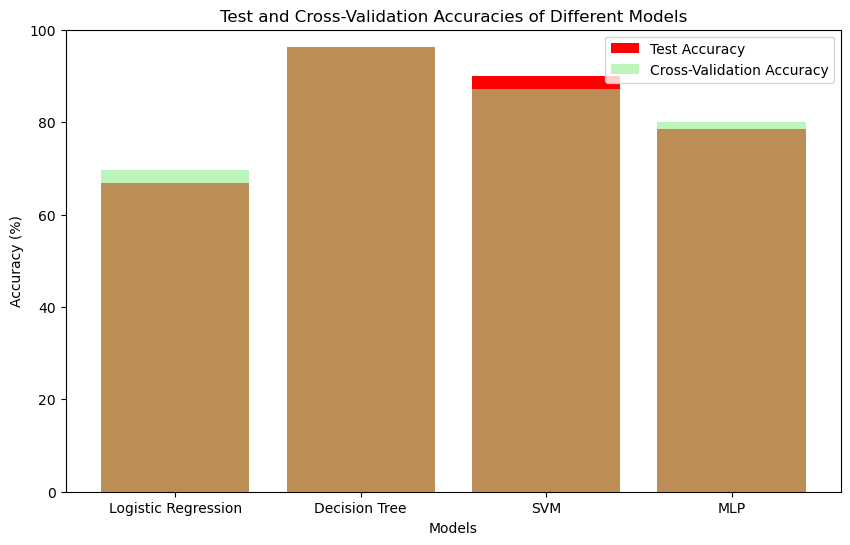

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_

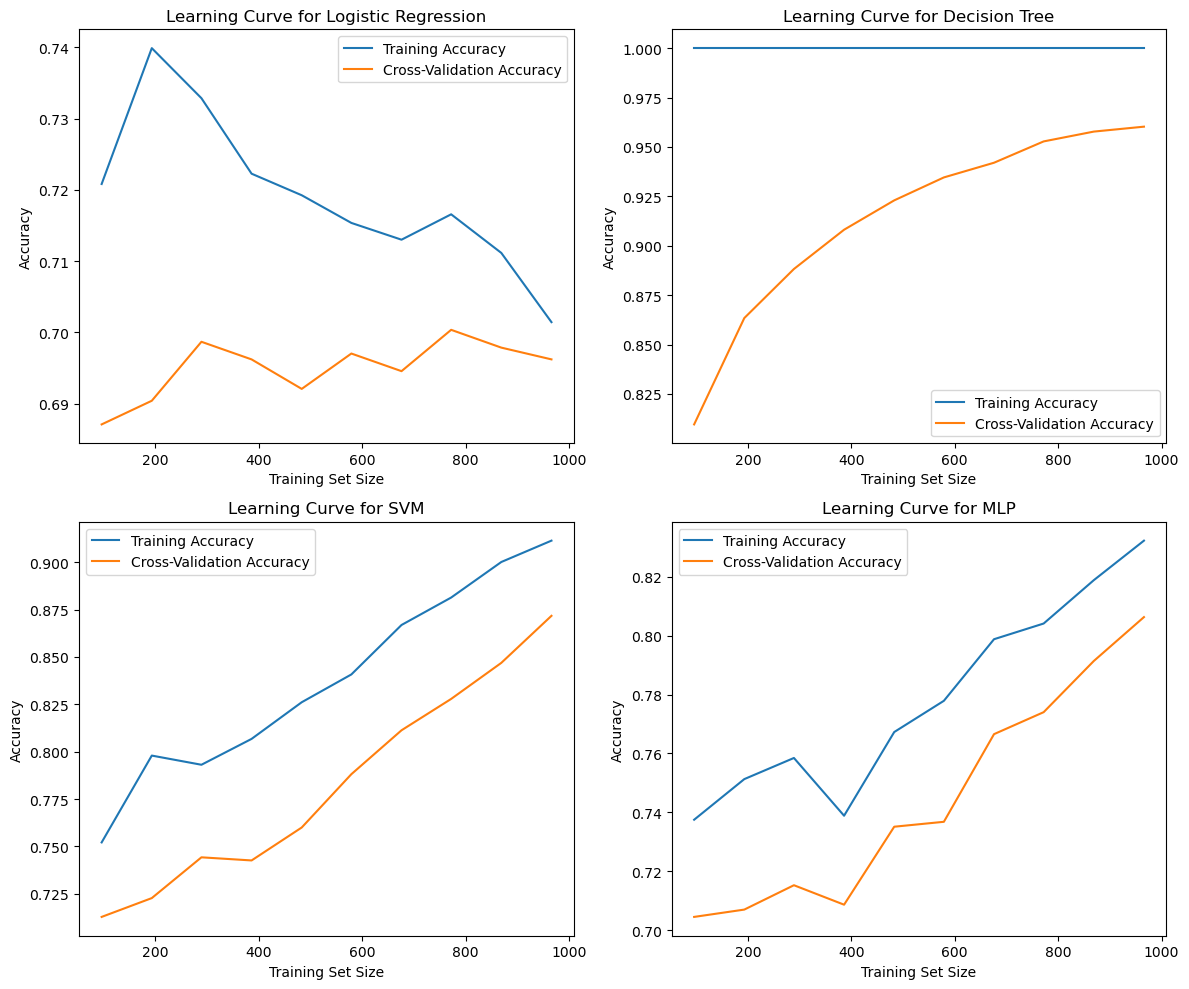

In [245]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning specifically
warnings.filterwarnings("ignore", category=ConvergenceWarning, message=".*Maximum iterations.*")

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "MLP": MLPClassifier(hidden_layer_sizes=100, max_iter=100, random_state=1)
}

# 1. Test and Cross-Validation Accuracy Comparison
accuracies = {}

for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Predict and calculate test accuracy
    y_pred = model.predict(x_test)
    test_accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    
    # Cross-validation accuracy
    cv_accuracy = round(cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy').mean() * 100, 2)
    
    accuracies[name] = {"Test Accuracy": test_accuracy, "CV Accuracy": cv_accuracy}

# Plot Test and CV Accuracies
test_acc = [accuracies[model]["Test Accuracy"] for model in accuracies]
cv_acc = [accuracies[model]["CV Accuracy"] for model in accuracies]
model_names = list(accuracies.keys())

plt.figure(figsize=(10, 6))
plt.bar(model_names, test_acc, color='red', label="Test Accuracy")
plt.bar(model_names, cv_acc, color='lightgreen', alpha=0.6, label="Cross-Validation Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Test and Cross-Validation Accuracies of Different Models")
plt.legend()
plt.ylim(0, 100)
plt.show()

# 2. Learning Curves
plt.figure(figsize=(12, 10))

for i, (name, model) in enumerate(models.items(), 1):
    train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    
    plt.subplot(2, 2, i)
    plt.plot(train_sizes, train_mean, label="Training Accuracy")
    plt.plot(train_sizes, test_mean, label="Cross-Validation Accuracy")
    plt.title(f"Learning Curve for {name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()

plt.tight_layout()
plt.show()


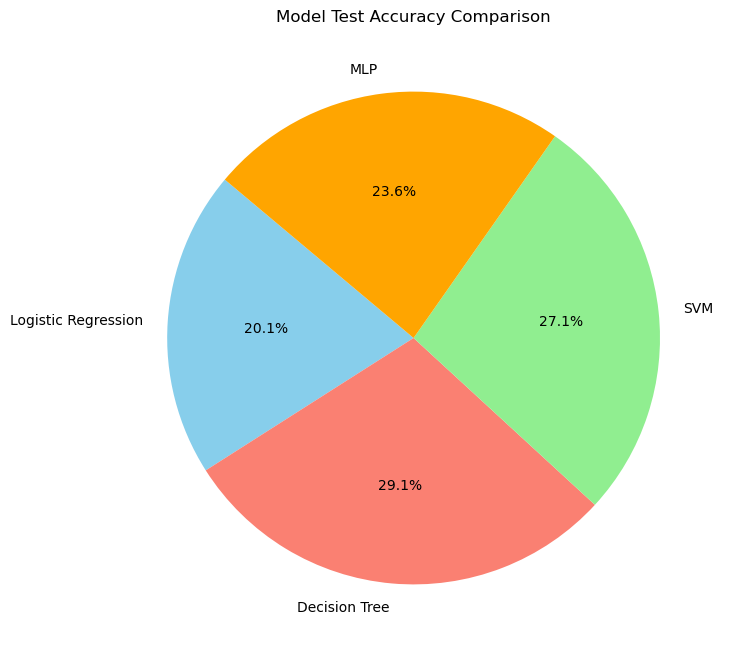

In [247]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "MLP": MLPClassifier(hidden_layer_sizes=100, max_iter=100, random_state=1)
}
accuracies = {}

for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test)
    
    # Calculate and store test set accuracy
    accuracies[name] = accuracy_score(y_test, y_pred) * 100

# Pie chart visualization
plt.figure(figsize=(8, 8))
plt.pie(accuracies.values(), labels=accuracies.keys(), autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.title("Model Test Accuracy Comparison")
plt.show()

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "MLP": MLPClassifier(hidden_layer_sizes=100, max_iter=100, random_state=1)
}

# Dictionary to store results
results = {}

# Perform training, prediction, and cross-validation for each model
for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Test set accuracy
    y_pred = model.predict(x_test)
    test_accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    
    # 5-fold cross-validation accuracy
    k = 5
    cv_accuracy = round(cross_val_score(model, x_train, y_train, cv=k, scoring='accuracy').mean() * 100, 2)
    
    # Store both accuracies
    results[name] = {"Test Accuracy": test_accuracy, "CV Accuracy": cv_accuracy}

# Print all accuracies
for model_name, accuracy in results.items():
    print(f"{model_name}:")
    print(f"  Test Accuracy: {accuracy['Test Accuracy']}%")
    print(f"  Cross-Validation (5-fold) Accuracy: {accuracy['CV Accuracy']}%\n")


Logistic Regression:
  Test Accuracy: 66.86%
  Cross-Validation (5-fold) Accuracy: 69.62%

Decision Tree:
  Test Accuracy: 96.34%
  Cross-Validation (5-fold) Accuracy: 96.19%

SVM:
  Test Accuracy: 89.98%
  Cross-Validation (5-fold) Accuracy: 87.17%

MLP:
  Test Accuracy: 78.42%
  Cross-Validation (5-fold) Accuracy: 80.05%

